In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("../preprocessed_data.csv")

X = df.drop(columns = ["music_genre"])
y = df["music_genre"]

X_train = pd.read_csv('../train_test_split_data/X_train.csv')
X_test = pd.read_csv('../train_test_split_data/X_test.csv')
y_train = pd.read_csv('../train_test_split_data/y_train.csv').values.ravel()
y_test = pd.read_csv('../train_test_split_data/y_test.csv').values.ravel()

In [2]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [3]:
gridsearch.best_params_

{'n_neighbors': 12}

Text(0.5, 1.0, 'kNN Confusion Matrix')

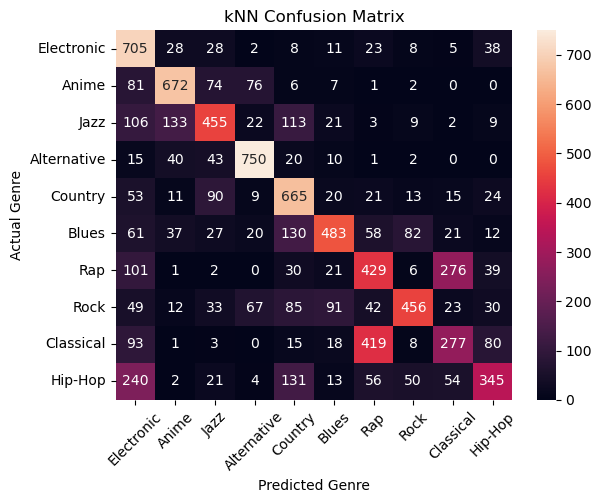

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
joblib.dump(knn_model, '../models/best_knn.pkl')
knn_model.score(X_test, y_test)

y_pred = knn_model.predict(X_test)

labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Blues', 'Rap', 'Rock', 'Classical', 'Hip-Hop']
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax, xticklabels=labels, yticklabels=labels)

# labels, title and ticks
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Predicted Genre')
ax.set_ylabel('Actual Genre') 
ax.set_title('kNN Confusion Matrix')

In [5]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.82      0.60       856
           1       0.72      0.73      0.72       919
           2       0.59      0.52      0.55       873
           3       0.79      0.85      0.82       881
           4       0.55      0.72      0.63       921
           5       0.69      0.52      0.59       931
           6       0.41      0.47      0.44       905
           7       0.72      0.51      0.60       888
           8       0.41      0.30      0.35       914
           9       0.60      0.38      0.46       916

    accuracy                           0.58      9004
   macro avg       0.59      0.58      0.58      9004
weighted avg       0.59      0.58      0.58      9004

